<h2>Ananlysis 3. The distribution of the numbers of editing sites per editing cluster</h2>
<p>Now, we calculate the numbers of editing sites forming the cluster and compare
them with the expected distribution</p>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re
import random
from editing_adlib import *
%matplotlib inline

In [10]:
def edcluster_size_dist(edsite_crd_dict):
    size_dict = dict()
    for seq_id in edsite_crd_dict.keys():
        edsite_crds = sorted(edsite_crd_dict[seq_id].keys())
        clust_size = 1
        for i in range(1, len(edsite_crds)):
            if edsite_crds[i] == edsite_crds[i - 1] + 1:
                clust_size += 1
            else:
                if not size_dict.get(clust_size):
                    size_dict[clust_size] = 0
                size_dict[clust_size] += 1
                clust_size = 1
        if clust_size > 1:
            if not size_dict.get(clust_size):
                size_dict[clust_size] = 0
            size_dict[clust_size] += 1
    return size_dict

def mkarr_from_dict(d):
    arr1 = [d[i] for i in sorted(d.keys())]
    arr2 = []
    for i in sorted(d.keys()):
        for j in range(d[i]):
            arr2.append(i)
    return arr1, arr2

def build_random_s_dist(fastadict, edsite_crd_dict, orf_crd_dict, syn_nsyn = None):
    rand_edsite_crd_dict = dict()
    for seq_id in fastadict.keys():
        if not edsite_crd_dict.get(seq_id):
            continue
        rand_edsite_crd_dict[seq_id] = dict()
        orf = fastadict[seq_id][orf_crd_dict[seq_id][0]:orf_crd_dict[seq_id][1]]
        adenine_pos_arr = [i.start() for i in re.finditer("A", orf)]
        pos_num = len(edsite_crd_dict[seq_id].keys())
        pos_arr = random.sample(adenine_pos_arr, pos_num)
        for i in range(pos_num):
            rand_edsite_crd_dict[seq_id][pos_arr[i]] = True
#    print(rand_edsite_crd_dict)
    return rand_edsite_crd_dict

In [4]:
def make_bars(edsites_oct, fastadict, orf_crd_dict, figname_1, figname_2):
    arr1, arr2 = mkarr_from_dict(edcluster_size_dist(edsites_oct))
    rand_s = build_random_s_dist(fastadict, edsites_oct, orf_crd_dict, syn_nsyn = None)
    brr1, brr2 = mkarr_from_dict(edcluster_size_dist(rand_s))
    arr = []
    for i in range(len(arr1)):
        arr.append(arr1[i]*(i+1))
    brr = []
    for i in range(len(brr1)):
        brr.append(brr1[i]*(i+1))
    print(np.log10(arr), brr)
    for i in range(len(brr),len(arr)):
        brr.append(0)
    arr = np.array(arr)
    brr = np.array(brr)
    plt.bar(list(range(1, len(arr) + 1)),height=np.log10(arr + 1))
    plt.savefig(figname_1)
    plt.show()
    plt.bar(list(range(1, len(arr) + 1)),height=np.log10(brr + 1))
    plt.savefig(figname_2)
    plt.show()

In [5]:
edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
orf_crd_dict_oct = read_orf_crd_file("../data/oct_orf_crds.txt")
fastadict_oct = readfasta("../data/orfs_oct_plus.fa")

edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
orf_crd_dict_bim = read_orf_crd_file("../data/bim_orf_crds.txt")
fastadict_bim = readfasta("../data/orfs_bim_plus.fa")

edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
orf_crd_dict_sep = read_orf_crd_file("../data/sep_orf_crds.txt")
fastadict_sep = readfasta("../data/orfs_sep_plus.fa")

edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)
orf_crd_dict_squ = read_orf_crd_file("../data/squ_orf_crds.txt")
fastadict_squ = readfasta("../data/orfs_squ_plus.fa")

[4.94230079 4.26245109 3.48742121 2.8739016  2.17609126 1.38021124
 0.84509804 0.90308999] [105817, 3414, 96, 8]


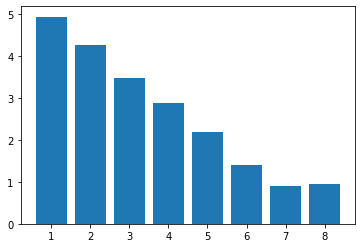

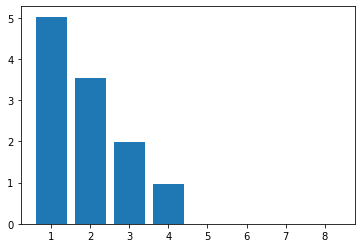

[4.74491073 4.06415837 3.27989498 2.66651798 2.11394335 1.38021124] [67272, 1842, 84, 4]


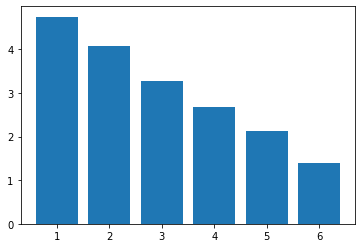

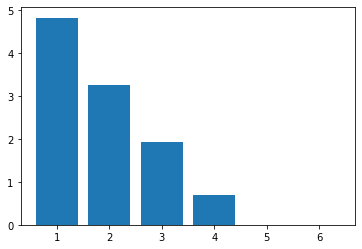

[4.98099362 4.3249817  3.60292771 2.95230801 2.21748394 1.38021124
 0.84509804 0.90308999] [116339, 4720, 276, 24]


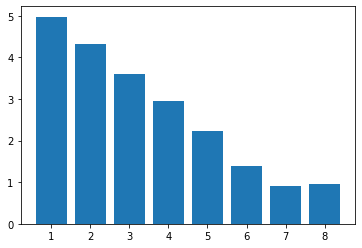

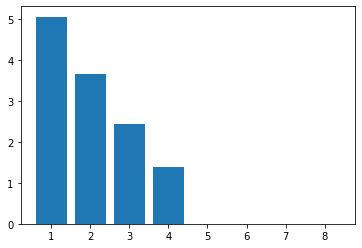

[4.7678235  4.14736711 3.43232779 2.79518459 2.07918125 0.77815125] [72959, 2452, 123, 8]


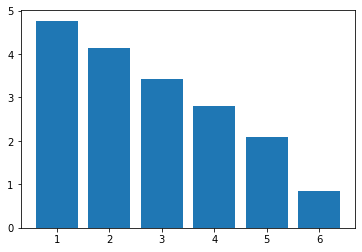

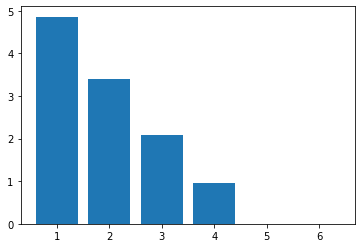

In [11]:
make_bars(edsites_oct, 
          fastadict_oct, 
          orf_crd_dict_oct, 
          "../article/suppl_figures/An3_clust_sizes/oct_real.pdf", 
          "../article/suppl_figures/An3_clust_sizes/oct_expd.pdf")

make_bars(edsites_bim, 
          fastadict_bim, 
          orf_crd_dict_bim, 
          "../article/suppl_figures/An3_clust_sizes/bim_real.pdf", 
          "../article/suppl_figures/An3_clust_sizes/bim_expd.pdf")

make_bars(edsites_sep, 
          fastadict_sep, 
          orf_crd_dict_sep, 
          "../article/suppl_figures/An3_clust_sizes/sep_real.pdf", 
          "../article/suppl_figures/An3_clust_sizes/sep_expd.pdf")

make_bars(edsites_squ, 
          fastadict_squ, 
          orf_crd_dict_squ, 
          "../article/suppl_figures/An3_clust_sizes/squ_real.pdf", 
          "../article/suppl_figures/An3_clust_sizes/squ_expd.pdf")